# Statistics Mini Project.

1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

  a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

  b)	Is there any evidence that the players overall rating is greater than 80?

  c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

  d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

  e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

Note: 
- 1) Perform all the Statistical analysis with 5%(Significance level). 
- 2) Perform the test of normality and test of variance in the appropriate places.




In [1]:
# lets import the required libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

import random
import statistics

In [2]:
# lets read the data set.
fifa = pd.read_csv('fifa_stats.csv')
fifa.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183


In [3]:
# lets check the shape of the data set.
fifa.shape

(2000, 15)

In [4]:
# lets see the columns of the data set.
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

In [5]:
# lets see the information of the data set.
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [6]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [7]:
# Hence there is no requirement of any change in datatype for any variables.

In [8]:
# lets round off the values in the variable 'Height' upto 2 decimal points.

fifa['Height'] = round(fifa['Height'],2)
fifa['Height']

0       5.58
1       6.17
2       5.75
3       6.33
4       5.08
        ... 
1995    5.75
1996    6.25
1997    5.08
1998    5.08
1999    5.58
Name: Height, Length: 2000, dtype: float64

In [9]:
# lets check for the null values.
fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [10]:
# There is no null values in 14 variables out of 15 variables.
# There are 19 null values in variable 'Club'.
# The amount of null values is 19 out of 2000 is very less.
# Theres no need of any treatment or dropping out of the variable.

### a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [11]:
# lets assume the age as population.
population = list(fifa['Age'])
len(population)

2000

In [12]:
# lets draw a sample of size 200 from the population.
sample = random.sample(population=population, k=200)
len(sample)

200

In [13]:
# lets find the standard deviation of the sample.
std = np.std(sample)
print('sample standard_deviation',round(std,2))

sample standard_deviation 3.79


In [14]:
# lets find the Standard Error of the sampling distribution.
Standard_error = std/np.sqrt(len(sample))
print('Standard Error:',round(Standard_error,2))

Standard Error: 0.27


In [15]:
# lets find the average of the sample.
sample_mean = np.mean(sample)
print('sample mean:',sample_mean)

sample mean: 26.83


In [16]:
# let us find average of the population.
pop_mean = np.mean(population)
print('Population mean:',pop_mean)

Population mean: 27.2315


In [17]:
# let us find standard deviation of the population.
pop_std = np.std(population)
print('Population standard_deviation:',round(pop_std,2))

Population standard_deviation: 3.86


In [18]:
# lets find the Standard Error of the population distribution.
Standard_error = pop_std/np.sqrt(len(population))
print('Standard Error:',round(Standard_error,2))


Standard Error: 0.09


##### let us comapre the results of Standard error and sample mean of sample sampling distribution, with the population mean and standard deviation.

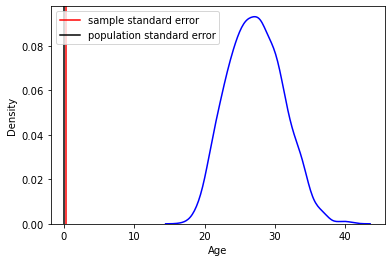

In [45]:
sns.kdeplot(fifa['Age'],color='blue')
plt.axvline(0.29, color='red',label='sample standard error')
plt.axvline(0.09, color='black',label='population standard error')
plt.legend()

###  Explanation for why the estimated standard error tends to decrease with increase in the sample size.

- Standard error decreases when sample size increases.
- As the sample size gets closer to the true size of the population.
- The sample means cluster more and more around the true population mean.
- As the sample size increases, the margin of error decreases.
- The standard error is also inversely proportional to the sample size.
- The larger the sample size, the smaller the standard error.

### b) Is there any evidence that the players overall rating is greater than 80?

In [19]:
## let us test using confidence Interval estimation.

In [20]:
# lets consider the overall rating as population:
population = list(fifa['Overall_rating'])
len(population)

2000

In [21]:
# let us draw a sample of size 1000 from the population.
sample = random.sample(population=population, k=1000)
len(sample)

1000

In [22]:
# let us get the average and standard deviation of the sample.
samp_mean = np.mean(sample)
samp_std = statistics.stdev(sample)
print('Sample mean:',samp_mean)
print('Standard deviation:',round(samp_std,2))

Sample mean: 78.338
Standard deviation: 3.35


In [23]:
# Confidence Interval Estimation:
interval = stats.norm.interval(0.95, loc=samp_mean, scale=std/np.sqrt(1000))
print('The 95% confidence Interval is:',np.round(interval,2))

The 95% confidence Interval is: [78.1  78.57]


### Conclusion:

- The 95% confidence interval doesnot contain the average overall rating(i.e 80).
- We have enough evidence that the players overall rating is lesser than 80.

### c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [24]:
fifa.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.58,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.17,183


In [25]:
fifa['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

In [ ]:
# Since one variable is categorical and one is numerical.
# The unique subcategories of the Preferred foot having 2 types.
# Hence perform 2 sample t-test.

### The Null and Alternative Hypothesis:
- Ho : mu1 = mu2, The averages of potential for preffered foot is same.
- H1 : mu1 !=mu2, The averages of the potential for preferred foot is different.

In [61]:
# lets get the required samples.
samp1 = fifa[fifa['Preferred Foot']=='Left']['Potential']
samp2 = fifa[fifa['Preferred Foot']=='Right']['Potential']

# lets get the sample size.
n1 = len(samp1)
n2 = len(samp2)

# degree of freedom.
dof = n1+n2-2
dof

1998

In [67]:
# lets find the t-value.
t_val = stats.t.isf(q=0.05/2,df=1998)
print('The critical Value for two-tailed t-test:',t_val)

The critical Value for two-tailed t-test: 1.961152014836706


In [69]:
# lets find the t-statistic value and p-value.
t_stat, pval = stats.ttest_ind(samp1,samp2)
print('t-score:',t_stat)
print('P-value:',pval)

t-score: 1.5378037422592814
P-value: 0.12425494914461453


### Conclusion:
- Here the t-score value is lesser than t-value.
- The P-value is greater than 0.05.
- The value lies in the acceptance region.
- Hence we fail to reject the Null hypothesis.
- we can conclude that there is no impact of preferred foot of a player on Potential.

### Graphical Analysis.

<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

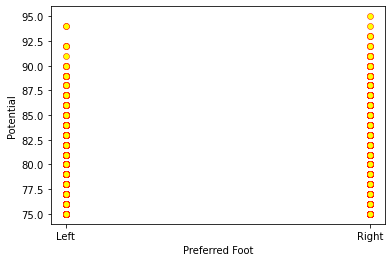

In [48]:
sns.scatterplot(fifa['Preferred Foot'],fifa['Potential'],edgecolor='red',color='yellow')

### From the above scatter plot that we can conclude there is no impact of preferred foot of a player on Potential.

### d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [26]:
fifa.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.58,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.17,183


##### for testing the relation between the overall rating and potential variables:
##### Pearson's correlation can be used.

In [27]:
# lets store the variables overall rating and potential.
x = fifa['Overall_rating']
y = fifa['Potential']

In [28]:
# Pearson's correlation.
import scipy
scipy.stats.pearsonr(x,y)

(0.7326945574179983, 0.0)

##### Conclusion:
- If the correlation value lies between ± 0.50 and ± 1 then we can say its strong positive correlation.
- Here the correlation value is +0.73.
- Thus we can conculde that variables Overall-rating and Potential are have strong positive correlation.

### e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [29]:
fifa.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.58,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.17,183


In [70]:
fifa['Skill Moves'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [ ]:
# since the analysis is on categorical and the numerical variables.
# And we have 5 number of samples we can proceed with one way anova test.

In [77]:
# lets get the required data.
n1 = fifa[fifa['Skill Moves']==1]['Overall_rating']
n2 = fifa[fifa['Skill Moves']==2]['Overall_rating']
n3 = fifa[fifa['Skill Moves']==3]['Overall_rating']
n4 = fifa[fifa['Skill Moves']==4]['Overall_rating']
n5 = fifa[fifa['Skill Moves']==5]['Overall_rating']

In [78]:
len(fifa['Overall_rating'])

2000

In [79]:
# lets find critical value for f-test.
f_val = stats.f.isf(q=0.05, dfn=4, dfd=1995)
print('The critical value for f-test is:',f_val)

The critical value for f-test is: 2.376388139318325


In [80]:
# lets find f-score and P-value.
f_score, pval = stats.f_oneway(n1,n2,n3,n4,n5)
print('F-score:',f_score)
print('P-value:',pval)

F-score: 31.085141826531746
P-value: 3.8236370526660514e-25


### Conclusion:
- Here the F-score value is greater than f-critical value.
- The p-value is lesser than 0.05.
- The value lies in the critical region.
- Hence we reject the null hypothesis.
- we can conclude that the skill moves has an effect on the overall rating.

In [51]:
fifa['Skill Moves'] = fifa['Skill Moves'].astype(object)

## Statistical Analysis.

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

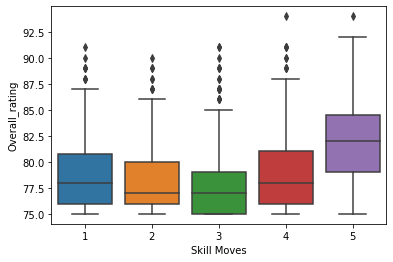

In [52]:
sns.boxplot(fifa['Skill Moves'],fifa['Overall_rating'])

### As we can analyse from the above barplot, the Skill moves has an effect on Overall rating, whereas with the increase in the skill move the Overall Rating of the player also Increases.

2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

- a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.
- b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.
- c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph
- d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.
- e)	Perform statistical tests to identify the relation between network and network_type. 
- Note: 
- 1) Perform all the Statistical analysis with 5%(Significance level). 
- 2) Perform the test of normality and test of variance in the appropriate places.


In [7]:
ph = pd.read_csv('phone.csv')
ph.head(2)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile


In [8]:
# lets check the shape of the data set.
ph.shape

(820, 6)

In [9]:
# lets check the columns of the data set.
ph.columns

Index(['date', 'duration', 'item', 'month', 'network', 'network_type'], dtype='object')

In [34]:
# lets check the information from the data set.
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [35]:
# lets convert the datatype of the date variable to date_time
ph['date'] = pd.to_datetime(ph['date'])

In [36]:
# lets check the datatype of date now.
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          820 non-null    datetime64[ns]
 1   duration      820 non-null    float64       
 2   item          820 non-null    object        
 3   month         820 non-null    object        
 4   network       820 non-null    object        
 5   network_type  820 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 38.6+ KB


In [37]:
# Lets round off the values in variable duration upto 2 decimal point.
ph['duration'] = round(ph['duration'],2)

In [38]:
# Lets check for the null values in the data set.
ph.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [39]:
# Since there is no null values in the data set, no need of any treatment for the variables.

### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [40]:
ph.head(2)

,date,duration,item,month,network,network_type
0,2014-10-15 06:58:00,221.32,data,2014-11,data,data
1,2014-10-15 06:58:00,81.61,call,2014-11,Vodafone,mobile


In [41]:
# let us first consider the duration values as population.
population = list(ph['duration'])
len(population)

820

In [42]:
# let us draw some random sample of 400 from the population.
sample = random.sample(population=population, k=400)
len(sample)

400

In [43]:
# let us calculate the average and standard deviation of the sample.
samp_mean = np.mean(sample)
samp_std = statistics.stdev(sample)
print('Sample mean:',round(samp_mean,2))
print('Standard deviation:',round(samp_std,2))

Sample mean: 145.29
Standard deviation: 43.78


In [44]:
# The 95% confidence Interval for average duration calls are:
interval = stats.norm.interval(0.95, loc=samp_mean, scale=samp_std/np.sqrt(400))
print('The 95% confidence interval is:',np.round(interval,2))

The 95% confidence interval is: [141.   149.58]


In [45]:
# The 99% confidence Interval for average duration calls are:
interval = stats.norm.interval(0.99, loc=samp_mean, scale=samp_std/np.sqrt(400))
print('The 95% confidence interval is:',np.round(interval,2))

The 95% confidence interval is: [139.65 150.93]


##### Conclusion:

- Here the 95% confidence Interval for average duration calls is [144.28,153.26].
- Here the 99% confidence Interval for average duration calls is [142.87 154.67].
- The 99% confidence Interval for average duration calls is wider.
- Out of 400 samples 99% sample have mean contained in this interval.
- Increasing the confidence will increase the margin of error resulting in a wider interval. 

### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [81]:
ph.head(2)

,date,duration,item,month,network,network_type
0,2014-10-15 06:58:00,221.32,data,2014-11,data,data
1,2014-10-15 06:58:00,81.61,call,2014-11,Vodafone,mobile


<AxesSubplot:ylabel='network'>

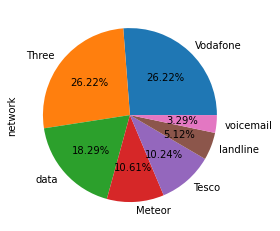

In [54]:
ph['network'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### Conclusion:
- As we can see from the above piechart for the percentage of the distribution is given.
- The networks are not equally distributed in the dataset.

### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph

<AxesSubplot:xlabel='duration', ylabel='Density'>

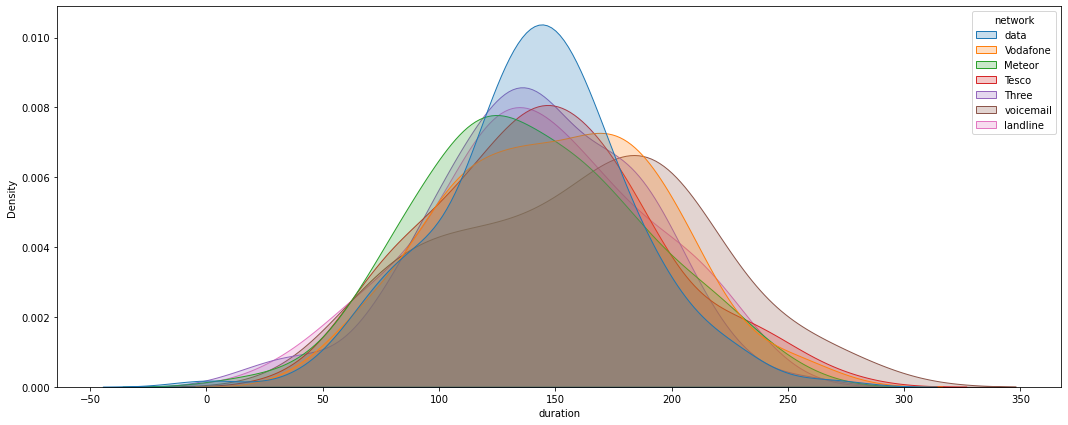

In [95]:
plt.figure(figsize=[18,7])
sns.kdeplot(data=ph,x='duration',hue='network',fill=True,common_norm=False)

### Conclusion.
- we can analyse from the above graph the network '**'data'** seems to be normally distributed its **leptokurtic.**
- we can see that the network **'vodafone','voicemail'** are seems to be **platy kurtic.**
- The networks **'meteror','Tesco' and 'Three'** are seems to be **mesokurtic.**

### d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [48]:
ph.head(2)

,date,duration,item,month,network,network_type
0,2014-10-15 06:58:00,221.32,data,2014-11,data,data
1,2014-10-15 06:58:00,81.61,call,2014-11,Vodafone,mobile


In [96]:
ph['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

### The Null and Alternative Hypothesis is.
- Ho : There is no relation between item and duration.
- H1 : There is realtion between item and duration.

In [99]:
# lets perform one-way anova
n1 = ph[ph['item']=='data']['duration']
n2 = ph[ph['item']=='call']['duration']
n3 = ph[ph['item']=='sms']['duration']

In [100]:
len(ph['duration'])

820

In [101]:
# lets find critical value for f-test.
f_val = stats.f.isf(q=0.05, dfn=2, dfd=817)
print("The critical value for f-test is:",f_val)

The critical value for f-test is: 3.0067437669029107


In [102]:
# lets find f-score and p-value.
f_score, pval = stats.f_oneway(n1,n2,n3)
print('F-score',f_score)
print('P-value',pval)

F-score 1.9314905605909087
P-value 0.14559323353297338


### Conclusion.
- Here the f-score value is greater than f-critical value.
- The P-value is lesser than the alpha value.
- The value lies in the rejection region.
- Thus we reject the Null hypothesis.
- we can conclude that there is a relation between the duration.

### e) Perform statistical tests to identify the relation between network and network_type.


In [49]:
ph.head(2)

,date,duration,item,month,network,network_type
0,2014-10-15 06:58:00,221.32,data,2014-11,data,data
1,2014-10-15 06:58:00,81.61,call,2014-11,Vodafone,mobile


##### Let us test the two categorical variables with Chi-Square Test for Independence.

### The Null and Alternative Hypothesis is:
- 𝐻0 : The variables network and networkk_type are independent

- 𝐻1 : The variables network and network_type are not independent

In [21]:
# lets crosstab the categorical data:
table = pd.crosstab(ph['network'],ph['network_type'])
table

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [22]:
# lets take the values of the table as observe values:
observed_values = table.values
observed_values

array([[  0,   0,  87,   0],
       [  0,   0,  84,   0],
       [  0,   0, 215,   0],
       [  0,   0, 215,   0],
       [150,   0,   0,   0],
       [  0,  42,   0,   0],
       [  0,   0,   0,  27]], dtype=int64)

- **aplha is 0.05**.
- **Degree of the freedom is =  no. of observations - 1, (7-1) = 6**

In [23]:
# lets calculate the critical value for chi-square test.
chi2_val = stats.chi2.isf(q=0.05,df=3)
print('The critical value for chi square test is:',round(chi2_val,2))

The critical value for chi square test is: 7.81


In [25]:
# let us calculate the chi2 score and pval for 2 categorical variable:

stat,p,dof,expected_value = chi2_contingency(observed = observed_values)
print('chi2_score:',stat)
print('P-value:',p)
print('degree of freedom:',dof)
print('expected_value:',expected_value)

chi2_score: 2460.0
P-value: 0.0
degree of freedom: 18
expected_value: [[ 15.91463415   4.45609756  63.76463415   2.86463415]
 [ 15.36585366   4.30243902  61.56585366   2.76585366]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 39.32926829  11.01219512 157.57926829   7.07926829]
 [ 27.43902439   7.68292683 109.93902439   4.93902439]
 [  7.68292683   2.15121951  30.78292683   1.38292683]
 [  4.93902439   1.38292683  19.78902439   0.88902439]]
